# Topic 4 - Data Acquisition, Loading and Storage 

Today we will learn about:
- How and where to get data from
- How images are loaded into a table-like structure
- How to save that table for better sharing
- See an image loading tutorial with four versions (Jupyter Notebook, Google Colab, GitHub & Kaggle)

##  Where to get data?

More resources on [our Trello Board!](https://trello.com/b/p8Zjr5U7/cmm560-resources)

### Kaggle

https://www.kaggle.com/

Talk about challenges and that they also have a workspace where you can upload your data (public or private) and run Python/R notebooks

### HuggingFace

https://www.huggingface.co/

Talk about transfer models

### UCI Machine Learning Repository

https://archive.ics.uci.edu/ml/index.php

## Pixel Loading

The most basic features in an image

Like atoms for matter!

An image is converted into a **vector** where each column represents a feature (pixel intensity)

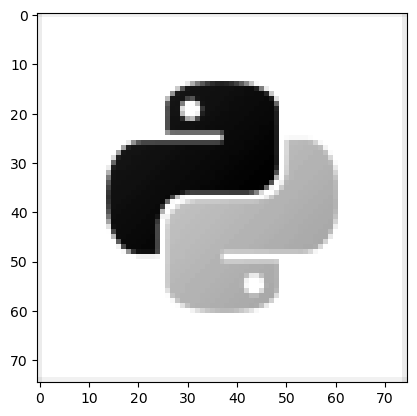

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
img = cv2.imread('imgs/logo.png', 0)
plt.imshow(img,'gray')

Now we need to `flatten` the image so that it is represented as a vector

In [2]:
print("Shape of original image: ", img.shape)
img_vector = img.flatten()
print("Flattened image: ", img_vector)
print("Shape of flattened image: ", img_vector.shape)

Shape of original image:  (75, 75)
Flattened image:  [234 246 246 ... 246 246 234]
Shape of flattened image:  (5625,)


As more images get imported, we can create an **image dataset** by appending new images into a `numpy` array

(75, 75)


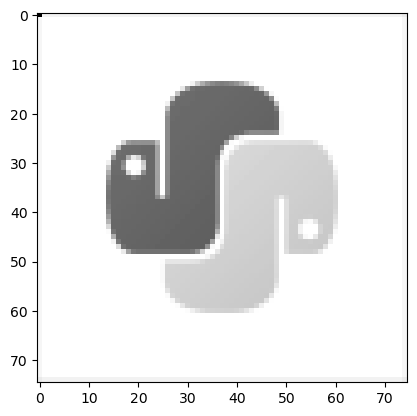

In [3]:
# creating a variable to store the dataset
dataset = img_vector.copy()
# Importing and showing a new image
img2 = cv2.imread('imgs/logotrans.png', 0)
plt.imshow(img2,'gray')
print(img2.shape)

In [4]:
# Flattening the second image
img_vector2 = img2.flatten()
# stacking the second vector created into our dataset
dataset = np.vstack((dataset,img_vector2))
# Printing the dataset
print('Pixels in the image dataset: ',dataset)
print('Shape of image dataset: ', dataset.shape)

Pixels in the image dataset:  [[234 246 246 ... 246 246 234]
 [  0 243 243 ... 242 242 234]]
Shape of image dataset:  (2, 5625)


Notice that we can append more images to create a larger dataset!

However, if we intend to use this dataset for **classification** purposes, then **all images should be of the same size**!

If a new image with a different size has to be added to `dataset`, then we can use the `resize` function in `OpenCV`

(150, 150)


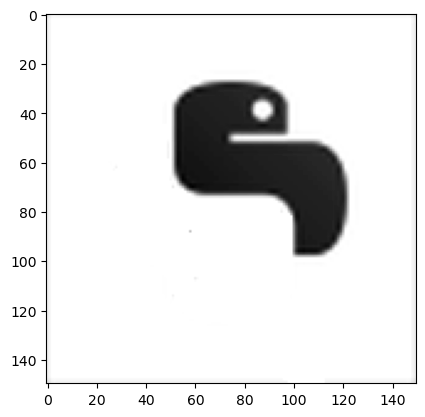

In [5]:
# Importing and showing a third image
img3 = cv2.imread('imgs/logoaltered.png', 0)
plt.imshow(img3,'gray')
print(img3.shape)

In [6]:
# Resizing the image
img3 = cv2.resize(img3, (75, 75))
print('New dimensions of the image: ', img3.shape)
# Flattening the third image
img_vector3 = img3.flatten()
# appending the third vector created
dataset = np.vstack((dataset,img_vector3))
# Printing the array
print(dataset, dataset.shape)

New dimensions of the image:  (75, 75)
[[234 246 246 ... 246 246 234]
 [  0 243 243 ... 242 242 234]
 [239 249 248 ... 248 249 239]] (3, 5625)


Sometimes, it is useful to **binarise images after importing & resizing** them to:

    - Reduce the values for the features
    - Increase quality/standardise samples

We will talk about this technique on our next session

### Save the dataset as a .csv file

In [7]:
np.savetxt("imgs/dataset.csv", dataset, delimiter=",")

Why this makes sense?

To share data easily!

How to do it with colour images?

You could have triples, or flatten the three dimensions. In the end, it is always easy to reconstruct provided that you know the images' dimensions!

### Issues with using pixels as features 

If a $75 \times 75$ image yielded $5'625$ features (pixels), imagine with larger images!

Moreover, not all pixels contain valuable information

This representation is typically not **rotation invariant** nor **structurally** representative of the images

Still, they are widely used in machine learning! **Why?!**

##  Data loading tutorial in Jupyter Notebook

Main issue: Libraries and processing power for next steps

##  Data Loading Tutorial in Google Colab

https://colab.research.google.com/drive/1_oG0raFSN9sMm4XjSwfo4SgFW8pS5Hi8?usp=sharing

Main issue: You cannot share so easily!

Solution: Create a Google account specifically for the project and share the credentials

##  Data Loading Tutorial in GitHub

https://github.com/carlosfmorenog/CMM560_Data_Loading_Tutorial

Main issue: Lower space, public (unless you do [this](https://docs.github.com/en/authentication/keeping-your-account-and-data-secure/creating-a-personal-access-token))

The token gives access to all your private repos! So be careful (maybe create an account just for that private project)

##  Data Loading Tutorial in Kaggle

https://www.kaggle.com/datasets/carlosmorenogarcia/data-loading-tutorial

Main issue: "low space" (100 GB, more if you make your dataset public)

## LAB 4: Loading your own data into a Jupyter Notebook